In [1]:
#Created By: Dominick Sinopoli 
#Math637_Project

#imports
import SVM_Functions as SVM   #*****make sure SVM_Fuctions.py is in same folder as SVM_Projet.ipynb*****
import pandas as pd
import numpy as np

In [2]:
#Load Data_Set and make any modifications
all_data=pd.read_csv('Combined_Spreadsheet_2.csv', header=0)
all_data['NG']  = (.20*all_data['Exam 1']) + (.20*all_data['Exam 2']) + (.25 *all_data['Final Exam Score']) + (.20 * all_data['Quizzes Score'])+ (.10 *all_data['Assignments Score']) + (.05 * all_data['Attendance and Participation Score'])
all_data['Quiz_Adv'] = ((all_data['Quiz 1'] + all_data['Quiz 2'] + all_data['Quiz 3']) / 3)

In [3]:
#Create Data_Set using: PF = 67, make_dummy = True
x_var = ['Quiz 1','Quiz 2','Quiz 3','Exam 1','Attendance and Participation Score']
y_var = 'NG'
x,y = SVM.make_data_set(all_data,x_var,y_var)
x.head()

,Quiz 1,Quiz 2,Quiz 3,Exam 1,Attendance and Participation Score
0,86.667,100.000,100.000,93.333,80.00
1,90.000,86.667,73.333,72.500,76.67
2,56.667,80.000,83.333,78.333,63.33
3,83.333,86.667,100.000,61.667,70.00
4,96.667,96.667,100.000,80.000,90.00


In [6]:
#comparing the basic SVM model kernels with gamma ='auto' and using: trials = 100 ****DO NOT RUN******
scores_gamma_auto = SVM.basic_SVM_test(x,y,gamma='auto')

SVM w/ kernel=rbf and gamma=auto 71.29186602870813
SVM w/ kernel=linear and gamma=auto 90.43062200956938
SVM w/ kernel=poly and gamma=auto 91.86602870813397
SVM w/ kernel=sigmoid and gamma=auto 72.48803827751196


In [129]:
#comparing the basic SVM model kernels with gamma ='scale' and using: trials = 100
scores_gamma_scale = SVM.basic_SVM_test(x,y,gamma='scale')

SVM w/ kernel=rbf and gamma=scale 91.89712918660287
SVM w/ kernel=linear and gamma=scale 91.68899521531098
SVM w/ kernel=poly and gamma=scale 91.54545454545452
SVM w/ kernel=sigmoid and gamma=scale 72.433014354067


In [ ]:
#From this analysis kernel = 'linear' and gamma = 'scale' became the chosen model to improve upon

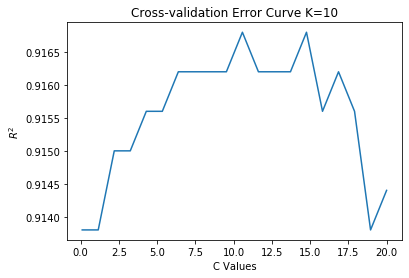

In [152]:
#Checking 'c' SVM regularization parameter using: K_folds = 10, kernel = 'linear' , gamma = 'scale' 
c_values = np.linspace(0.1,20,20)
SVM.c_cross_validation(x,y,c_values)

In [ ]:
#  The SVM regularization paramenter had no effect on the accuary of the model therefore 
#  no need to change it from default of 1

In [4]:
#SVM_linear_bootstrap using: test_size = .25,samples = 100, c = 1, gamma = 'scale'
x_var_num  = 5
coefs,intercept = SVM.SVM_linear_bootstrap(x,y,x_var_num)

Coefficient Adverage: [0.02580389 0.01613224 0.02143797 0.1164113  0.0325692 ]
Intercept Adverage: [-14.65331205]


In [5]:
#SVM test using: N = 100 (trials), test_size = .25
x_var = ['Quiz 1','Quiz 2','Quiz 3','Exam 1','Attendance and Participation Score']
scores,index = SVM.SVM_test(x,y,coefs,intercept,x_var)

Boosted SVM w/ linear kernel: 91.95933014354065
SVM w/ linear kernel: 91.67464114832534
SVM w/ default kernel (rbf): 91.58373205741624
Linear Regression: 54.89680386763488


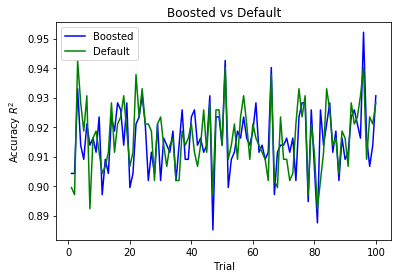

In [12]:
#Bootstrap linear SVM vs Regualr linear SVM graph using: trials = 100
labels = ['Boosted','Default']
SVM.make_two_trial_graph(scores[:,1:3],labels)

In [55]:
#Error graph 
#the predicted value is the scores from the model on the misclassifed data

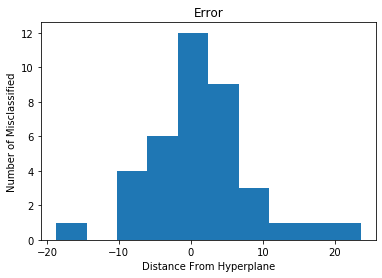

In [68]:
SVM.make_error_graph(all_data,index,intercept,coefs,x_var)

In [2]:
# Now want to look at SVM classifiers and reduce to 2D for visualtion using the boosted linear model
# 3 scenarios:
#           (1) Quiz 1,2,3 adv and Exam 1
#           (2) Quiz 1,2,3 adv and Attendance and Participation 
#           (3) Exam 1 and Attendance and Participation            

Coefficient Adverage: [0.06785327 0.10455047]
Intercept Adverage: [-11.45348249]


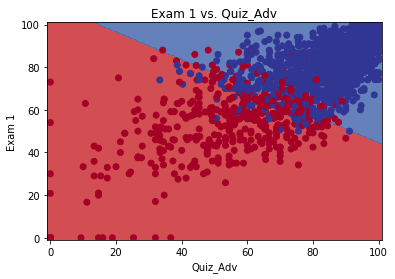

Coefficient Adverage: [0.07300869 0.01963206]
Intercept Adverage: [-6.38833657]


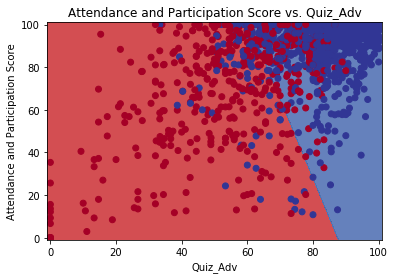

Coefficient Adverage: [0.12048622 0.03594694]
Intercept Adverage: [-10.69682501]


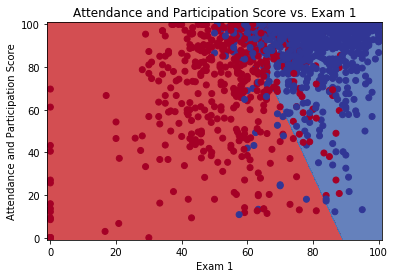

In [53]:
y_var = 'NG'
x_var_num  = 2
var = ['Quiz_Adv','Exam 1','Attendance and Participation Score']
combos = [[0,1],[0,2],[1,2]]
for i in range(len(combos)):
    x_var = [var[combos[i][0]],var[combos[i][1]]]
    x,y = SVM.make_data_set(all_data,x_var,y_var)
    coefs,intercept = SVM.SVM_linear_bootstrap(x,y,x_var_num)
    SVM.make_contour_plot_2D(x,y,x_var,intercept,coefs)

In [1]:
#  Now we can use a 3D plot to see the hyperplane separating the data using Quiz_Adv, Exam 1
#  and Attendance and Participation using the boosted linear model

Coefficient Adverage: [0.0616901  0.11615163 0.03174044]
Intercept Adverage: [-14.45705723]


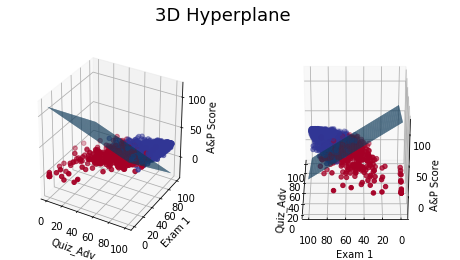

In [23]:
y_var = 'NG'
x_var_num  = 3
x_var = ['Quiz_Adv','Exam 1','Attendance and Participation Score']
x,y = SVM.make_data_set(all_data,x_var,y_var)
coefs,intercept = SVM.SVM_linear_bootstrap(x,y,x_var_num)
SVM.make_3D(x,y,x_var,intercept,coefs)

In [57]:
import importlib
importlib.reload(SVM)

<module 'SVM_Functions' from '/Users/Dom/Desktop/Grades_Data_Analysis/SVM_Functions.py'>